In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/.DS_Store
/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/train/.DS_Store
/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/train/NORMAL/IM-0176-0001.jpeg
/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/train/NORMAL/IM-0177-0001.jpeg
/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/train/NORMAL/IM-0160-0001.jpeg
/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/train/NORMAL/IM-0166-0001.jpeg
/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/train/NORMAL/IM-0170-0001.jpeg
/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/train/NORMAL/IM-0162-0001.jpeg
/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/train/NORMAL/IM-0172-0001.jpeg
/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/train/NORMAL/IM-0168-0001.jpeg
/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/train/NORMAL/IM-0164-0001.jpeg
/content/drive/MyDrive/C

In [54]:
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

## import keras

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten 
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.vis_utils import plot_model

## import sklearn 

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [55]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train = train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/train",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 470 images belonging to 1 classes.


In [66]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val = val_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/val",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [57]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test = test_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [68]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train,validation_data = val, epochs = 20)

Epoch 1/20
15/15 [==============================] - 15s 946ms/step - loss: 0.1509 - accuracy: 0.9319 - val_loss: 12.4335 - val_accuracy: 0.5000
Epoch 2/20
15/15 [==============================] - 14s 923ms/step - loss: 1.1298e-11 - accuracy: 1.0000 - val_loss: 25.3223 - val_accuracy: 0.5000
Epoch 3/20
15/15 [==============================] - 15s 991ms/step - loss: 2.0496e-21 - accuracy: 1.0000 - val_loss: 29.6923 - val_accuracy: 0.5000
Epoch 4/20
15/15 [==============================] - 14s 916ms/step - loss: 1.1538e-23 - accuracy: 1.0000 - val_loss: 30.8317 - val_accuracy: 0.5000
Epoch 5/20
15/15 [==============================] - 14s 933ms/step - loss: 8.7515e-24 - accuracy: 1.0000 - val_loss: 31.1036 - val_accuracy: 0.5000
Epoch 6/20
15/15 [==============================] - 14s 916ms/step - loss: 4.7761e-24 - accuracy: 1.0000 - val_loss: 31.1660 - val_accuracy: 0.5000
Epoch 7/20
15/15 [==============================] - 14s 921ms/step - loss: 6.1699e-24 - accuracy: 1.0000 - val_loss:

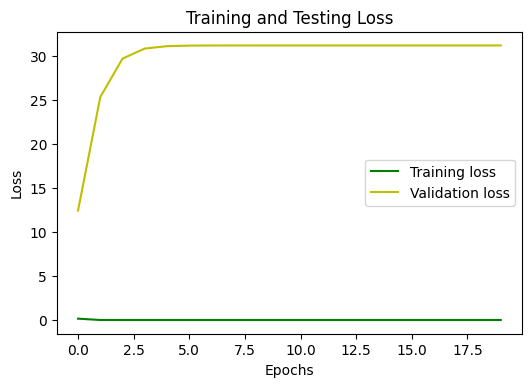

In [69]:
## plot loss for train and test

loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.figure(figsize=(6,4), dpi=100)
plt.plot(loss_train, 'g', label = 'Training loss')
plt.plot(loss_val, 'y', label = 'Validation loss')
plt.title("Training and Testing Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

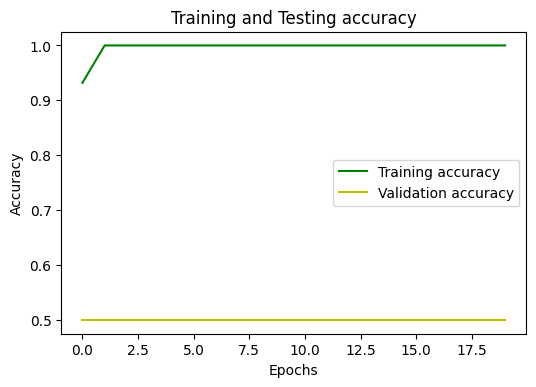

In [70]:
## plot loss for train and test

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
plt.figure(figsize=(6,4), dpi=100)
plt.plot( loss_train, 'g', label = 'Training accuracy')
plt.plot( loss_val, 'y', label = 'Validation accuracy')
plt.title("Training and Testing accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()